In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle as pk

In [29]:
%cd /content/drive/MyDrive/NLP/csv

/content/drive/MyDrive/NLP/csv


In [4]:
df=pd.read_csv("cleaned_resume.csv")

In [5]:
all_text = ' '.join(df['cleaned_resume'])

In [6]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

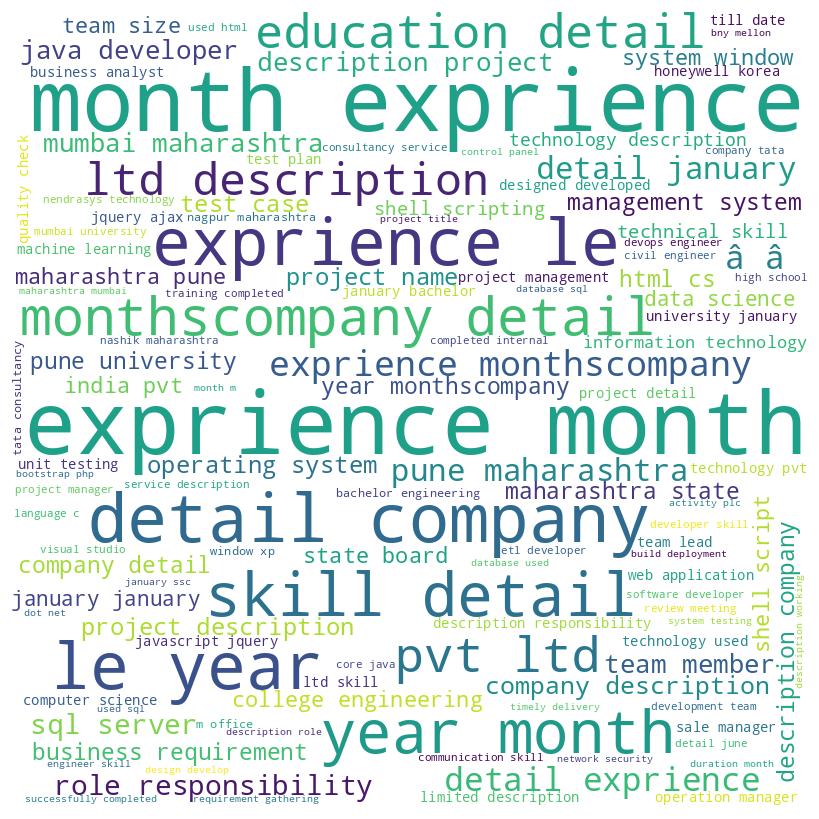

In [7]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
df['Category_no'] = df.groupby('Category').ngroup()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.cleaned_resume,
    df.Category_no,
    test_size = 0.2,
    random_state=2,
    stratify=df.Category_no
)

In [10]:
ls

aclImdb/                           glove.6B.100d.txt
aclImdb_v1.tar.gz                  resume_classification_model/
cleaned_resume                     resume_dataset.csv
cleaned_resume.csv                 Resume_dataset_final.csv
cleaned_resume_dataset.csv         sample_da_job2.docx
cleaned_resume_dataset.gsheet      sample_da_job.docx
cleaned_resume_final.csv           test/
Data_analyst_sample_job_desc.gdoc  UpdatedResumeDataSet.csv


different models if derent embedding teqnique 

*   TFIDF-KNN - tfidf_knn.pkl
*   TFIDF-Gaussian naive bayes classifier - tfidf_gnb.pkl
*   TFIDF-Random forest - tfidf_rf.pkl
*   Word2vec KNN - word2vec_knn.pkl
*   word2vec RF - word2vec_RF.pkl 
*   word2Vec Gaussian naive bayes - Gword2vec_gnb.pkl
*   BERT - 




In [30]:
ls

aclImdb/                           glove.6B.100d.txt
aclImdb_v1.tar.gz                  resume_classification_model/
cleaned_resume                     resume_dataset.csv
cleaned_resume.csv                 Resume_dataset_final.csv
cleaned_resume_dataset.csv         sample_da_job2.docx
cleaned_resume_dataset.gsheet      sample_da_job.docx
cleaned_resume_final.csv           test/
Data_analyst_sample_job_desc.gdoc  UpdatedResumeDataSet.csv


In [31]:
import tensorflow as tf
from transformers import BertTokenizer

In [32]:
resume_classification_model = tf.keras.models.load_model('resume_classification_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=df['Category'].unique()):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [34]:
import numpy as np

In [36]:
input_text = df['cleaned_resume'][0]
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(resume_classification_model, processed_data=processed_data)
print(f"Predicted Category: {result}")

1/1 [==============================] - 1s 1s/step
Predicted Category: DevOps Mechanical Engineer


In [11]:
model =pk.load(open('/content/drive/MyDrive/NLP/pkl/tfidf_knn.pkl', 'rb'))

In [12]:
test = []
test.append(df['Resume'][36])

y_pred_test = model.predict(test)
print('Category of predicted resume is : ', df.loc[df['Category_no'] == y_pred_test[0]]['Category'].unique()[0])
print(df['Category'][36])

Category of predicted resume is :  Data Science
Data Science


##similarity demo 


In [13]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import docx2txt

In [15]:
cd ..


/content/drive/MyDrive/NLP


In [16]:
cd helper_function/

/content/drive/MyDrive/NLP/helper_function


In [17]:
import preprocess_text as ps


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
ls

preprocess_text.py  __pycache__/  simlarity.py  TFIDFsim.py


In [20]:
import simlarity

In [21]:
ls

preprocess_text.py  __pycache__/  simlarity.py  TFIDFsim.py


In [22]:
# Job description

job_description = docx2txt.process("/content/drive/MyDrive/NLP/csv/sample_da_job2.docx")#please the correct path 

In [23]:
job_description_tokenised =ps.preprocess_text([job_description])

In [24]:
df_data_science = df.loc[df['Category']=='Data Science']

In [25]:
df_data_science['Similarity_Percent']= simlarity.get_similarity(df_data_science['cleaned_resume'],job_description_tokenised,2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
<ipython-input-25-f93b4aed49ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [26]:
df_data_science

,Unnamed: 0,Category,Resume,cleaned_resume,Category_no,Similarity_Percent
0,0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,5,0.962901
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may data scientist data s...,5,0.963969
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,5,0.960228
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,5,0.866335
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,5,0.985868
5,5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...,5,0.981506
6,6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill python tableau data visualization r stud...,5,0.977675
7,7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education detail rayat bahra institute enginee...,5,0.983706
8,8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skill ability quickly grasp technical...,5,0.990994
9,9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise data quantitative analysis decision ...,5,0.840078


In [27]:
similarity_list 

NameError: ignored

In [ ]:
new

In [ ]:
for k in new:
  df_data_science[df_data_science['cleaned_resume']==k[0]
  break

In [ ]:
df_data_science.Similarity_Percent[]

In [ ]:
df["animal"] = df["String1"].map(lambda s: next((animal for animal in search_list if animal in s), "other"))